In [1]:
from keras.datasets import fashion_mnist

In [2]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# get the target classes and their names
import numpy as np
classes = np.unique(train_labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

The target classes are the 10 different types of clothing pieces in the dataset and we will be classifying the images into these. The goal of the model is to predict where the image belongs to.

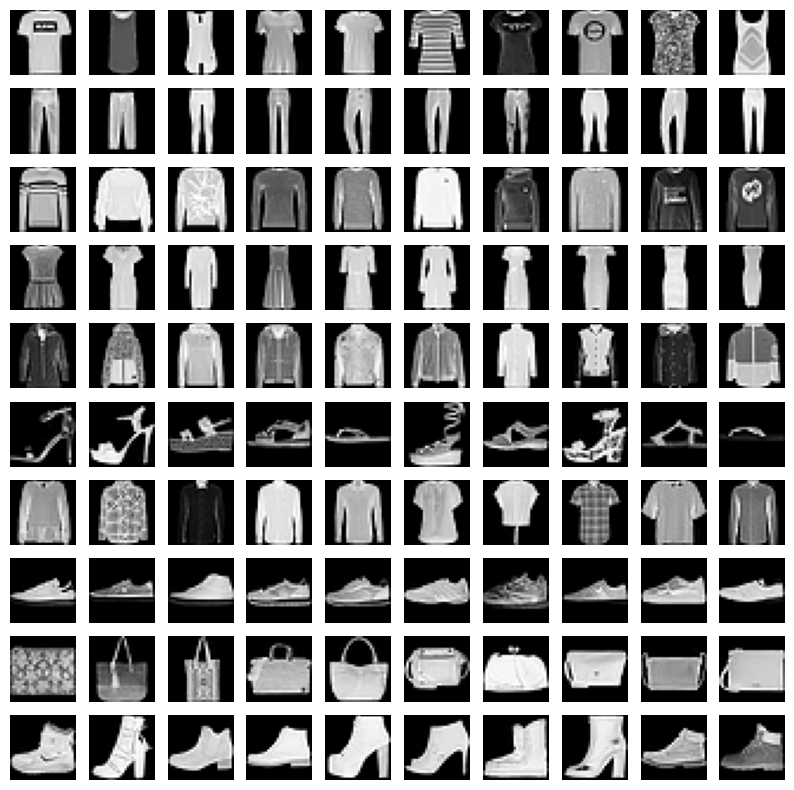

In [4]:
# display 10 images from each class
import matplotlib.pyplot as plt
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    axs[i, 0].set_ylabel(class_names[i])
    for j in range(10):
        axs[i, j].imshow(train_images[train_labels==i][j], cmap='gray')
        axs[i, j].axis('off')
plt.show()

In [5]:
# get the number of training and test images
print('Number of training images: ', train_images.shape[0])
print('Number of test images: ', test_images.shape[0])

Number of training images:  60000
Number of test images:  10000


In [6]:
# print the total number of images in the entire dataset
print('Total number of images: ', train_images.shape[0] + test_images.shape[0])

Total number of images:  70000


In [7]:
# describe the data type of the images
print('Data type of the images: ', train_images.dtype)

Data type of the images:  uint8


In [8]:
# describe the shape of the images
print('Shape of the images: ', train_images.shape[1:])

# print the shape of both training and test images
print('Shape of training images: ', train_images.shape)
print('Shape of test images: ', test_images.shape)

Shape of the images:  (28, 28)
Shape of training images:  (60000, 28, 28)
Shape of test images:  (10000, 28, 28)


The fashion MNIST dataset as we can see above contains 10 classes of images. Each image is a 28x28 grayscale image. There are 60,000 training images and 10,000 test images in the dataset. The data type of the images is uint8 and the shape of the images is (28, 28). It is about fashion clothing items such as T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot. The images are grayscale and the pixel values range from 0 to 255. The preprocessing steps required for the images are as follows:
- Reshaping of the data: Because the images come as a flat array of 784 pixels (28x28), we need to reshape these into either a 2D or 3D format.
- Normalisation: The pixel values range from 0 to 255. We need to normalise the pixel values to the range [0, 1]. We can achieve this by dividing the pixel values by 255. This will help the neural network to converge faster as the input features will be on the same scale.
- Data type conversion: since the pixel values range as unsigned integers ranging from 0 to 255, we need to convert it to either float32 or float64 as once we have normalised the pixel values, they will be in the range [0, 1] meaning that they will be floating point numbers. If i don't convert the datatype BEFORE normalising the pixel values, the pixel values will be rounded to 0 or 1 and this will be a problem for the neural network to learn.
- One-hot encoding of the labels: The labels are integers ranging from 0 to 9. We need to convert the labels to one-hot encoding as the categorical crossentropy loss function requires the labels to be in this format.
- Split the dataset: Split the dataset into training and validation sets. We can use the validation set to evaluate the performance of the model during training. This will help us to avoid overfitting and fine-tune the hyperparameters of the model.
- Data augmentation: To improve the performance of the model, we can use data augmentation to generate more training data. This will help the model to generalise better. For example, we can use the ImageDataGenerator class from the Keras API to generate more training data by applying random transformations to the images such as rotation, zooming, shifting, etc...

RESHAPE THE DATA

In [9]:
# reshape the data (if we are using a CNN which we will be later on then we need 3 for RGB. This means adding a channel dimension)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [10]:
# print the shape of the data after reshaping
print('Shape of the training images after reshaping: ', train_images.shape)
print('Shape of the test images after reshaping: ', test_images.shape)

Shape of the training images after reshaping:  (60000, 28, 28, 1)
Shape of the test images after reshaping:  (10000, 28, 28, 1)


CONVERT THE DATA TYPE TO FLOAT32

In [11]:
# convert the data type to float32
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

In [12]:
# print the data type of the images after conversion
print('Data type of the training images after conversion: ', train_images.dtype)
print('Data type of the test images after conversion: ', test_images.dtype)

Data type of the training images after conversion:  float32
Data type of the test images after conversion:  float32


NORMALISE THE PIXEL VALUES

In [13]:
# normalise the pixel values from [0, 255] to [0, 1]
train_images /= 255.0
test_images /= 255.0

In [14]:
# print the minimum and maximum pixel values after normalisation
print('Minimum pixel value after normalisation: ', train_images.min()) # should be 0.0
print('Maximum pixel value after normalisation: ', train_images.max()) # should be 1.0

Minimum pixel value after normalisation:  0.0
Maximum pixel value after normalisation:  1.0


ONE-HOT ENCODE THE LABELS

In [15]:
# one-hot encode the labels using the to_categorical function from the Keras API
from tensorflow import keras
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [16]:
# check if one-hot encoding worked
print('One-hot encoded training labels: ', train_labels[0])
print('One-hot encoded test labels: ', test_labels[0])

One-hot encoded training labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
One-hot encoded test labels:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


SPLIT THE DATASET

In [17]:
# split the dataset
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [18]:
# print the shape of the training and validation sets after splitting
print('Shape of the training images after splitting: ', train_images.shape)
print('Shape of the training labels after splitting: ', train_labels.shape)
print('Shape of the validation images after splitting: ', val_images.shape)
print('Shape of the validation labels after splitting: ', val_labels.shape)

Shape of the training images after splitting:  (48000, 28, 28, 1)
Shape of the training labels after splitting:  (48000, 10)
Shape of the validation images after splitting:  (12000, 28, 28, 1)
Shape of the validation labels after splitting:  (12000, 10)


OPTIONAL: DATA AUGMENTATION TO INCORPORATE MORE TRAINING DATA LEADING TO TO BETTER GENERALISATION AND REDUCING OVERFITTING

In [19]:
# data augmentation using the ImageDataGenerator class from the Keras API to generate more training data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
train_datagen.fit(train_images) # fit the data generator to the training data

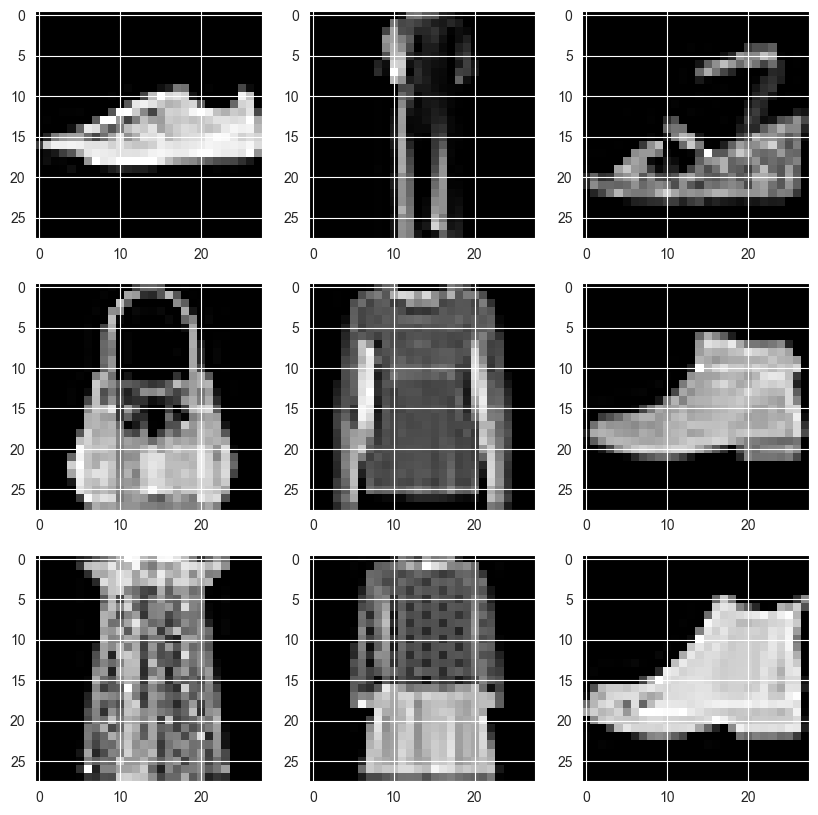

In [20]:
# check if the data augmentation worked by plotting some augmented images
# these are the original images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
plt.show() # show the original images

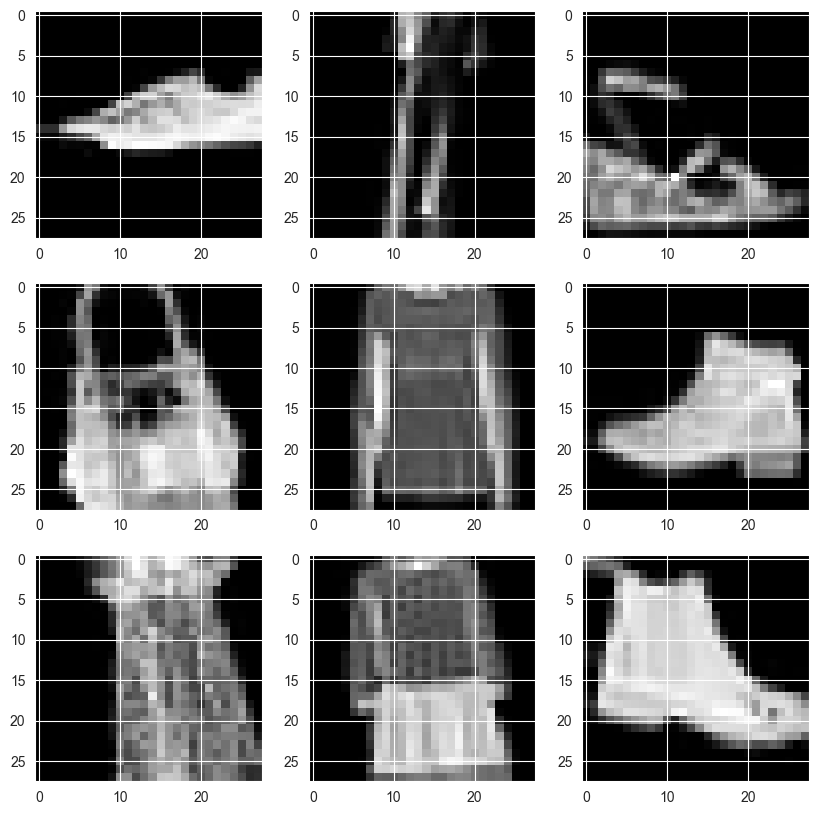

In [21]:
# these are the augmented images generated by the data generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_datagen.random_transform(train_images[i]).reshape(28, 28), cmap='gray')
plt.show() # show the augmented images generated by the data generator

We have now successfully prepared the data for training. We can now move on to the next step which is to build the model.

### Task 1.2 Setting up a model for training



PLAN OF ATTACK:
- Input layer: because we have already reshaped the data to 28x28x1, we can use the flatten layer to flatten the data into a 1D array of size 784. The dense layers expect a 1D array as input so this is why this is needed. When we are using a CNN, then we don't need to flatten the data as the convolutional layers will do this for us as Conv2D can process 2D input directly. Also, it is wise to mention that we can add a flatten layer before the final dense layers to convert the output of the convolutional layers into a 1D array.
- Hidden layers: we will test out different number of hidden layers and nodes. Use a suitable amount of neurons such as 128 or 256. The relu activation function will help as it vanishes gradient issues and is computationally efficient.
- Output layer: we have 10 classes so we need 10 output nodes. The softmax activation function will help as it will give us the probability of each class. This will convert the output of the dense layer into a probability distribution over the 10 classes, ensuring that the sum of the probabilities is 1.0.

BEFORE TRAINING THE MODEL LET'S IMPORT TENSORBOARD AND SET UP A CALLBACK TO LOG THE METRICS

In [22]:
import os
from datetime import datetime
from keras.callbacks import TensorBoard

# Create a logs directory with a timestamp subdirectory for the current run
logs_dir = "logs"
timestamp = datetime.now().strftime("%Y%m%d-%H%M%S")
log_subdir = os.path.join(logs_dir, timestamp)
os.makedirs(log_subdir, exist_ok=True)

# Initialize the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_subdir, histogram_freq=1, write_graph=True, write_images=True)

# Note: make sure to add the tensorboard_callback to the fit() method when training the model so that the metrics are logged

MAKE A METHOD TO STORE THE RESULTS OF EACH MODEL SO WE CAN COMPARE THEM LATER IN A MARKDOWN TABLE

In [23]:
results = [] # use this to store all the values and results so we can later compare them in a markdown table

In [24]:
def add_model_results(model_name, training_accuracy, validation_accuracy, training_loss, validation_loss):
    results.append({
        "model_name": model_name,
        "training_accuracy": training_accuracy,
        "validation_accuracy": validation_accuracy,
        "training_loss": training_loss,
        "validation_loss": validation_loss
    })


NOW LET'S BUILD THE MODEL

In [25]:
# import the necessary modules
from keras.models import Sequential # to create the model
from keras.layers import Dense, Flatten # to create the layers
from keras.utils import plot_model # to plot the model

In [26]:
# create the model
model = Sequential(
    [
        Flatten(input_shape=(28, 28, 1)), # input layer (flatten the 28x28x1 image into a 1D array of size 784)
        Dense(128, activation='relu'), # hidden layer (use 128 nodes and relu activation function)
        Dense(256, activation='relu'), # hidden layer (use 256 nodes and relu activation function)
        Dense(128, activation='relu'), # hidden layer (use 128 nodes and relu activation function)
        Dense(10, activation='softmax') # output layer (use 10 nodes and softmax activation function)
    ]
)

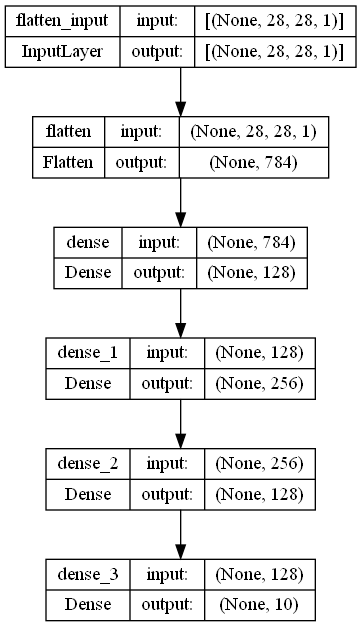

In [27]:
# plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) # plot the model

Loss function: we use this during training to measure the difference between the predicted values and the actual values. The ultimate goal is to minimise this loss function. We use the categorical crossentropy loss function as we have a multi-class classification problem. If we had a binary classification problem, we would use the binary crossentropy loss function. The optimiser will utilise the gradients of the loss function to update the weights of the model to obtain the best possible result. We are dealing with the fashion mnist dataset which has 10 classes, so we use the categorical crossentropy loss function.

Metrics: this is used to determine how well the model is performing in both training and validation. Some metrics are loss, accuracy, precision, recall, f1 score, etc. We use the accuracy metric as it is the most common metric used for classification problems. We can also use the precision and recall metrics as they are also used for classification problems.

Optimiser: we can use the Adam optimizer. Adam is an adaptive learning rate optimization algorithm that combines the benefits of AdaGrad and RMSProp. It has become a popular choice due to its ability to handle noisy and sparse gradients and converge faster than many other optimization algorithms. Some other optimizers include SGD, RMSProp, Adagrad, Adadelta, Adamax, Nadam, etc...
- batch size: we can use a batch size of 32. This is a happy medium between computational efficiency and generalisation because smaller batch sizes will tend to generalise better but will be slower to train. Larger batch sizes will train faster but may not generalise as well.
- number of epochs: we can use 20 epochs. This is a good starting point as it is not too small and not too large. We can always increase the number of epochs if the model is not performing well. The main goal is to find the sweet spot where the model is not overfitting or underfitting. We must monitor the validation loss and accuracy to determine if we need to change the number of epochs. If there are any alarming signs, we can always use further techniques such as dropout, weight regularisation or early stopping to improve the model. A range between 20-50 is recommended on most datasets.
- learning rate: we can specify a specific learning rate if needed, such as 0.0001, but the adam optimiser already does so by default. To improve our model i'm going to include both momentum and a learning rate schedule while also changing the optimiser to SGD. This will hopefully help us to converge faster and obtain a better result.

In [28]:
# create a learning rate schedule so that the learning rate decreases as the number of epochs increases
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [29]:
# configure the SGD optimiser instead of the adam optimiser along with momentum and the learning rate schedule we created
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

In [30]:
# compile the new model with the new optimiser and learning rate schedule and momentum
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 167,690
Trainable params: 167,690
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit the model
history = model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=20,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard_callback]
)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5499 - accuracy: 0.8028 - val_loss: 0.4219 - val_accuracy: 0.8464
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3973 - accuracy: 0.8535 - val_loss: 0.3934 - val_accuracy: 0.8548
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3572 - accuracy: 0.8674 - val_loss: 0.4017 - val_accuracy: 0.8497
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3310 - accuracy: 0.8762 - val_loss: 0.3896 - val_accuracy: 0.8566
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3141 - accuracy: 0.8821 - val_loss: 0.3371 - val_accuracy: 0.8756
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2937 - accuracy: 0.8901 - val_loss: 0.3377 - val_accuracy: 0.8741
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2801 - accuracy: 0.8932 - val_loss: 0.3348 - val_accuracy:

In [33]:
# make a function to start tensorboard after training the model. this will let us visualise the training process
def start_tensorboard():
    %load_ext tensorboard
    %tensorboard --logdir logs

In [34]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

313/313 [==============================] - 0s 908us/step - loss: 0.3553 - accuracy: 0.8859
Test loss: 0.35533109307289124, Test accuracy: 0.8859000205993652


In [35]:
# this will save the model, so we can use it later without having to train it again
model_name = "model_1"
training_accuracy = history.history['accuracy'][-1] # get the last value in the accuracy list which is the final accuracy
validation_accuracy = history.history['val_accuracy'][-1] # get the last value in the val_accuracy list which is the final val_accuracy
training_loss = history.history['loss'][-1] # get the last value in the loss list which is the final loss
validation_loss = history.history['val_loss'][-1] # get the last value in the val_loss list which is the final val_loss
add_model_results(model_name, training_accuracy, validation_accuracy, training_loss, validation_loss) # add the results to the results dictionary

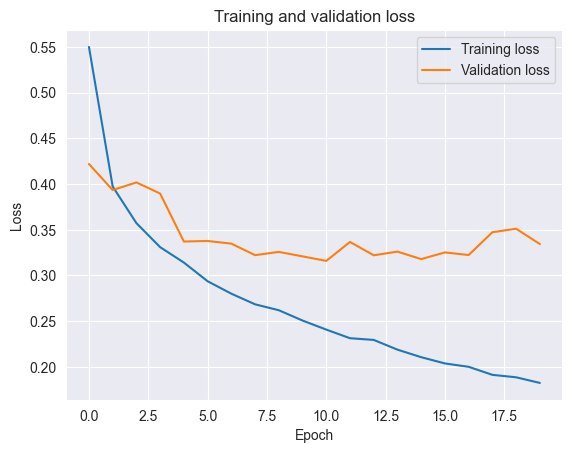

In [36]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Initial Findings:
- The training loss diminishes across epochs, signifying that the model is effectively learning from the data and updating the weights
accordingly.
- The training accuracy escalates across epochs, demonstrating the model's enhanced performance on the training dataset.
- The validation loss doesn't consistently decline, but rather stays relatively constant. This could imply that the model might not be generalising optimally to unseen data, potentially leading to overfitting, especially during later epochs when the validation loss starts to rise.
- The validation accuracy initially improves but then levels off around epoch 11. This indicates that the model's performance on the validation dataset ceases to make significant progress beyond a certain point.

Possible enhancements: (primarily based on extensive experimentation to discover the optimal model)
- Incorporate regularization methods like dropout or weight decay (L1 or L2 regularization) to enhance generalization.
- Utilize early stopping with a specified patience value to halt training when the validation performance fails to improve for a designated number of epochs.
- Explore varying architectures, such as adding or removing layers, or adjusting the number of units in the hidden layers.
- Refine hyperparameters like the learning rate, batch size, or optimizer configurations.

To estimate the number of trainable parameters in the model we can use the following formula:
number_of_parameters = (number_of_input_units + 1) * number_of_output_units
where the +1 is for the bias term associated with each output unit.

Based on the model from above where we had 5 layers, we can estimate the number of trainable parameters as follows:
Flatten layer: This layer has no trainable parameters as it simply reshapes the input.
First Dense layer: (28 * 28 * 1 + 1) * 128 = 100480 parameters
Second Dense layer: (128 + 1) * 128 = 16512 parameters
Third Dense layer: (128 + 1) * 128 = 16512 parameters
Output Dense layer: (128 + 1) * 10 = 1290 parameters
Total number of trainable parameters: 100480 + 16512 + 16512 + 1290 = 134794 parameters

The memory usage will depend on many factors such as the model's architecture, batch size, device used (CPU/GPU/TPU), etc. However, we can estimate the memory usage for training and inference as follows:
memory_usage = batch_size * (number_of_trainable_parameters * 4)
where the 4 is for the 32-bit floating point precision used for the weights as it requires 4 bytes of memory. This formula will give us the memory used for storing the gradients during backpropagation. It's important to mention that these are rough estimates and can be influenced by many moving parts (number of params, input data size, framework overhead, intermediate activations, memory optimisations, etc).

To calculate the memory usage here is what I have in mind:
MEMORY USAGE FOR TRAINING:
memory_usage_gradients = batch_size * (number_of_trainable_parameters * 4)
Knowing that the batch size is 32 and the total number of trainable parameters is 134794, we can estimate the memory usage for storing the gradients as follows: memory_usage_gradients = 32 * (134794 * 4) = 17,253,504 bytes ≈ 17.25 MB
Note: this will only count the memory required for gradients, we still need to account for input data, model params, optimizer states, etc...

MEMORY USAGE FOR INFERENCE:
we know that for inference, memory usage will mainly depend on the input data size and the model parameters. We can estimate the memory usage for inference as follows:
memory_usage_parameters = number_of_trainable_parameters * 4
memory_usage_parameters = 134794 * 4 = 539,176 bytes ≈ 0.54 MB
then if we wanted to estimate the memory usage for a single image, we can do the following:
memory_usage_single_image = (28 * 28 * 1) * 4 = 3136 bytes ≈ 0.003 MB


# Initialisation method for the model weights
I didn't specify an initialisation method for the model weights, so the default method is used. The default method is the glorot_uniform initialisation method, which is also known as Xavier uniform initialisation. This method is designed to have a good balance between the weights' scale and the number of input and output units, which helps the model train more effectively.

The Glorot Uniform initialization method draws the initial weights from a uniform distribution within the range:

[-limit, limit]

where limit = sqrt(6 / (fan_in + fan_out)), with fan_in being the number of input units in the weight tensor, and fan_out being the number of output units.
It is known to work well with ReLU activation functions, which is the activation function used in the model above in the hidden layers but it is also possible to try different initialisation methods to see if they can improve the model's performance. eg: "he_normal".

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten, Dense

# Reinitialise the model but this time with a different initialisation method
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dense(128, activation='relu', kernel_initializer='he_normal'),
    Dense(10, activation='softmax')
])

In [38]:
# extract the weights from the first dense layer
first_dense_layer = model.layers[1]
weights, biases = first_dense_layer.get_weights()

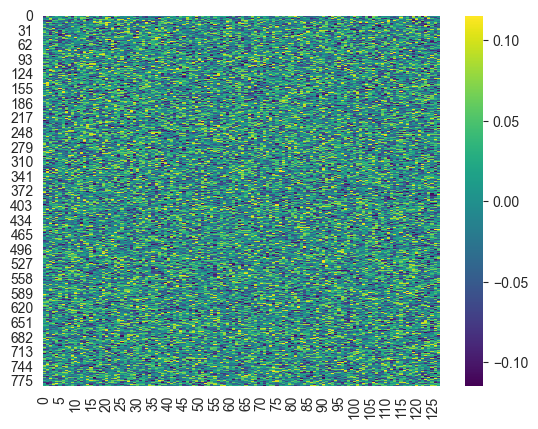

In [39]:
# plot the weights as a heatmap
sns.heatmap(weights, cmap='viridis') # cmap='viridis' is used to make the heatmap more readable by using a colour scheme
plt.show()

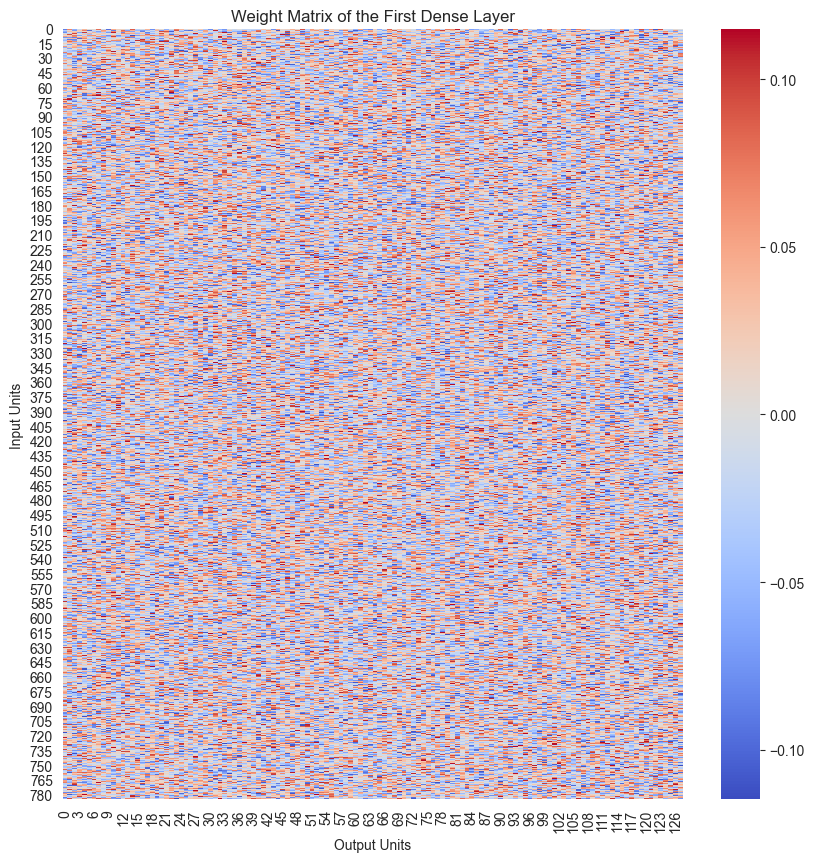

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(weights, cmap='coolwarm', center=0)
plt.xlabel('Output Units')
plt.ylabel('Input Units')
plt.title('Weight Matrix of the First Dense Layer')
plt.show()

The code above displays a heatmap of the weight matrix of the first dense layer, where rows represent the input units and columns represent the output units. Warmer colors such as red will indicate higher values, while cooler colors such as blue will indicate lower values.

In [41]:
# after fitting the model, we can extract the weights again and plot them as a heatmap to see how they changed
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # compile the model but this time with adam optimizer instead of sgd

In [42]:
# fit the model with the parameters specified above and then visualize the weights again to see how they changed
history = model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=20,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard_callback]
)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5085 - accuracy: 0.8165 - val_loss: 0.4339 - val_accuracy: 0.8394
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3814 - accuracy: 0.8589 - val_loss: 0.3734 - val_accuracy: 0.8620
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3408 - accuracy: 0.8732 - val_loss: 0.3543 - val_accuracy: 0.8683
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3211 - accuracy: 0.8803 - val_loss: 0.3647 - val_accuracy: 0.8670
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2989 - accuracy: 0.8891 - val_loss: 0.3529 - val_accuracy: 0.8734
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2862 - accuracy: 0.8926 - val_loss: 0.3202 - val_accuracy: 0.8848
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2709 - accuracy: 0.8972 - val_loss: 0.3729 - val_accuracy:

In [43]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

313/313 [==============================] - 0s 956us/step - loss: 0.3744 - accuracy: 0.8856
Test loss: 0.3744356334209442, Test accuracy: 0.8855999708175659


In [44]:
# save the model again in the results dictionary
model_name = 'model_2'
training_accuracy = history.history['accuracy'][-1] # get the last value in the accuracy list
validation_accuracy = history.history['val_accuracy'][-1] # get the last value in the val_accuracy list
training_loss = history.history['loss'][-1] # get the last value in the loss list
validation_loss = history.history['val_loss'][-1] # get the last value in the val_loss list
add_model_results(model_name, training_accuracy, validation_accuracy, training_loss, validation_loss)

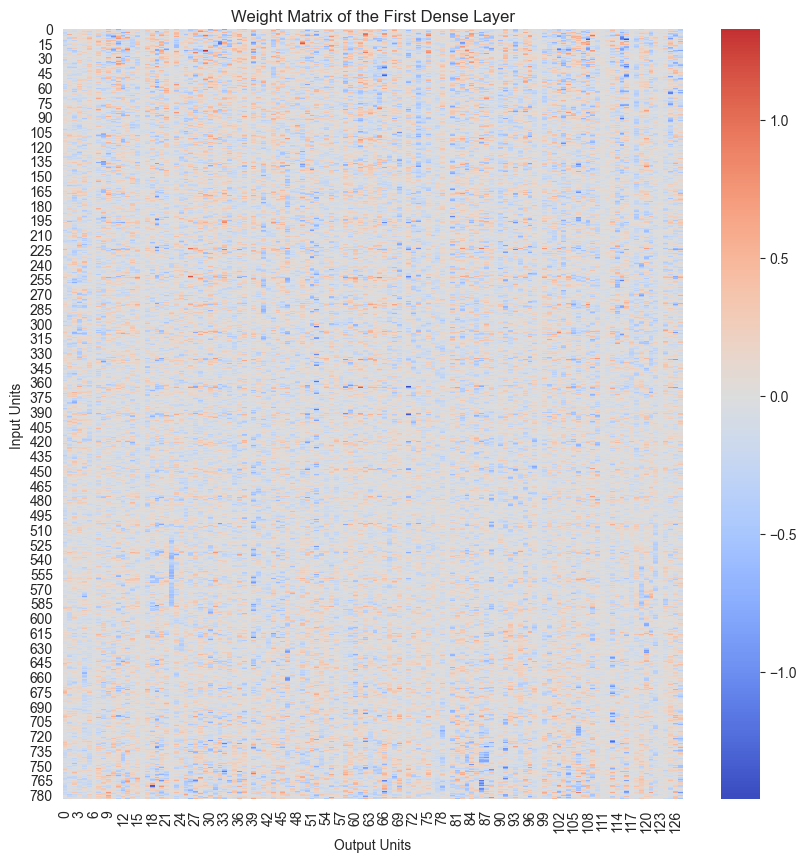

In [45]:
# visualise the final weights and compare them with the initial ones to see how they changed
first_dense_layer = model.layers[1] # extract the first dense layer
weights, biases  = first_dense_layer.get_weights() # extract the weights

plt.figure(figsize=(10, 10))
sns.heatmap(weights, cmap='coolwarm', center=0)
plt.xlabel('Output Units')
plt.ylabel('Input Units')
plt.title('Weight Matrix of the First Dense Layer')
plt.show()

In [46]:
# print a summary of the model and the weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


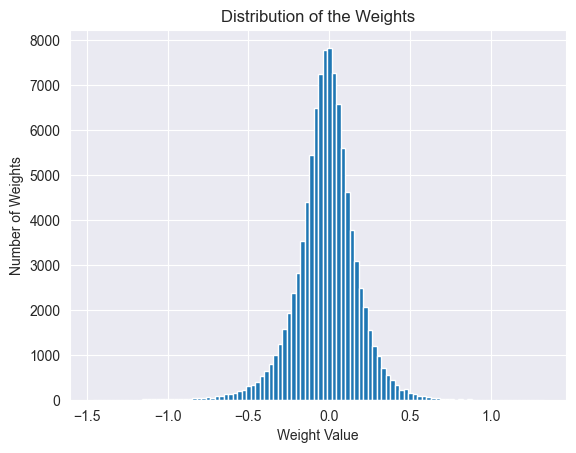

In [47]:
# plot the weights as a histogram to see the distribution of the weights
plt.hist(weights.flatten(), bins=100)
plt.xlabel('Weight Value')
plt.ylabel('Number of Weights')
plt.title('Distribution of the Weights')
plt.show()

After fitting the model we can see the weights have changed to better fit the training data. The weights are now more spread out and the distribution is more uniform. This is a good sign that the model is learning and improving. The purpose is to train the NN to find the best weights that will allow it to make accurate predictions on unseen data and minimise the loss function. During the training process it uses the optimizer which in this case is adam (adaptive moment estimation) as it has adaptive learning rates for each parameter, incorporates momentum by using the moving average of the gradient instead of the raw gradient which helps the model converge faste due to better navigation through regions of high curvature and oscilliation, bias correction during the early stages of training and is ideal for non-stationary problems such as computer vision tasks which is the case here (fashion MNIST). It's also good to mention that it's very convenient to use as it doesn't require runing of hyperparameters.

In [48]:
# reconstruct the model
model = Sequential(
        [
            Flatten(input_shape=(28, 28, 1)),  # input layer
            Dense(64, activation='relu'),  # hidden layer
            Dense(128, activation='relu'),  # hidden layer
            Dense(256, activation='relu'),  # hidden layer
            Dense(10, activation='softmax')  # output layer
        ]
    )

In [49]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
# train the model and fit it with the TensorBoard callback
history = model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=20,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard_callback], # we need this to use the TensorBoard callback
)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5211 - accuracy: 0.8111 - val_loss: 0.4325 - val_accuracy: 0.8407
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3823 - accuracy: 0.8594 - val_loss: 0.3735 - val_accuracy: 0.8643
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3420 - accuracy: 0.8737 - val_loss: 0.3591 - val_accuracy: 0.8687
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3242 - accuracy: 0.8802 - val_loss: 0.3502 - val_accuracy: 0.8757
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3029 - accuracy: 0.8872 - val_loss: 0.3698 - val_accuracy: 0.8654
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2911 - accuracy: 0.8911 - val_loss: 0.3346 - val_accuracy: 0.8779
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2771 - accuracy: 0.8950 - val_loss: 0.3345 - val_accuracy:

In [51]:
# this will save the model so we can use it later without having to train it again
model_name = "model_3"
training_accuracy = history.history['accuracy'][-1] # get the last value in the accuracy list which is the final accuracy
validation_accuracy = history.history['val_accuracy'][-1] # get the last value in the val_accuracy list which is the final val_accuracy
training_loss = history.history['loss'][-1] # get the last value in the loss list which is the final loss
validation_loss = history.history['val_loss'][-1] # get the last value in the val_loss list which is the final val_loss
add_model_results(model_name, training_accuracy, validation_accuracy, training_loss, validation_loss) # add the results to the results dictionary

In [52]:
# save these results to a csv file so we can use them later
import pandas as pd
df = pd.DataFrame(history.history)
df.to_csv('history.csv', index=False)

In [53]:
# load the results from the csv file
df = pd.read_csv('history.csv') # load the results from the csv file
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.521053,0.811104,0.432493,0.840667
1,0.382259,0.859396,0.373500,0.864333
2,0.341992,0.873750,0.359058,0.868667
3,0.324238,0.880208,0.350243,0.875667
4,0.302948,0.887167,0.369809,0.865417


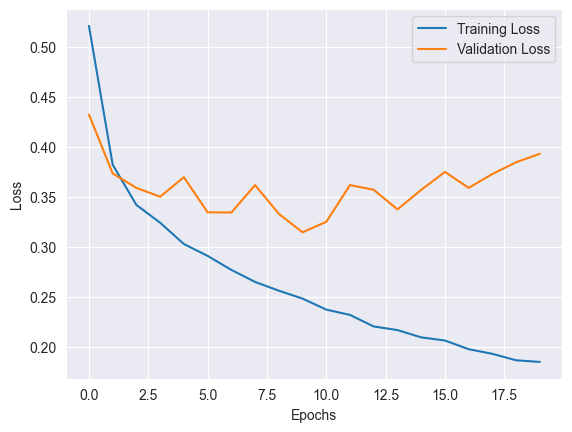

In [54]:
# plot the training and validation loss
plt.plot(df['loss'], label='Training Loss')
plt.plot(df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Based on these results we can see that the model is overfitting as the training loss is decreasing while the validation loss is increasing. This means the model is learning the training data too well and is not generalising well to unseen data. It performs well on training data but not on validation data.
We can see that overfitting occurs around epoch 3. The training loss is decreasing while the validation loss is increasing. This means the model is learning the training data too well and is not generalising well to unseen data. It performs well on training data but not on validation data. The model is simply memorising the training data. Some possible ways to overcome this are to use dropout, early stopping or regularisation. It's also possible to use a smaller network architecture or increase the amount of training data via data augmentation.

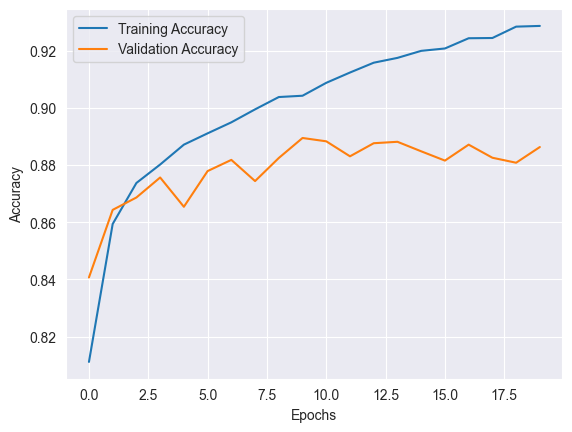

In [55]:
# plot the training and validation accuracy
plt.plot(df['accuracy'], label='Training Accuracy')
plt.plot(df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

EXTRA: trying CNN's to see if they perform better than the deep forward NNs we have been using so far

In [56]:
# create a simple CNN model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [57]:
# compile the model everytime before fitting it again so it doesn't use the previous weights and biases. we want it to start from scratch everytime to ensure we are making a fair comparison
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
# fit the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.05, validation_data=(val_images, val_labels), callbacks=[tensorboard_callback])

Epoch 1/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5190 - accuracy: 0.8102 - val_loss: 0.3705 - val_accuracy: 0.8596
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3377 - accuracy: 0.8770 - val_loss: 0.3073 - val_accuracy: 0.8873
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2871 - accuracy: 0.8943 - val_loss: 0.3047 - val_accuracy: 0.8863
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2545 - accuracy: 0.9062 - val_loss: 0.2967 - val_accuracy: 0.8902
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2311 - accuracy: 0.9147 - val_loss: 0.3122 - val_accuracy: 0.8887
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2129 - accuracy: 0.9204 - val_loss: 0.2758 - val_accuracy: 0.9028
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1919 - accuracy: 0.9278 - val_loss: 0.3057 - val_ac

In [59]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.9037
Test loss: 0.4446103572845459, Test accuracy: 0.9036999940872192


In [60]:
# this will save the model so we can use it later without having to train it again
model_name = "model_4"
training_accuracy = history.history['accuracy'][-1] # get the last value in the accuracy list which is the final accuracy
validation_accuracy = history.history['val_accuracy'][-1] # get the last value in the val_accuracy list which is the final val_accuracy
training_loss = history.history['loss'][-1] # get the last value in the loss list which is the final loss
validation_loss = history.history['val_loss'][-1] # get the last value in the val_loss list which is the final val_loss
add_model_results(model_name, training_accuracy, validation_accuracy, training_loss, validation_loss) # add the results to the results dictionary

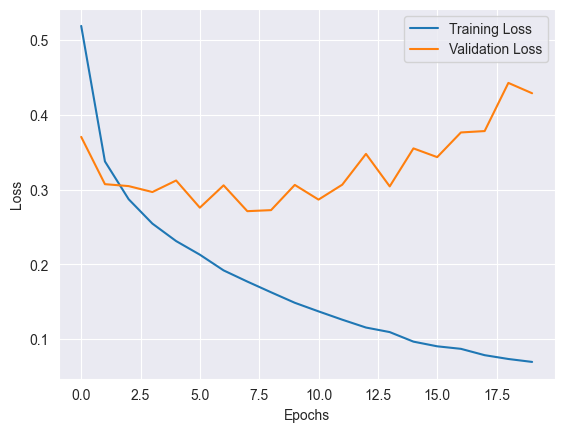

In [61]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

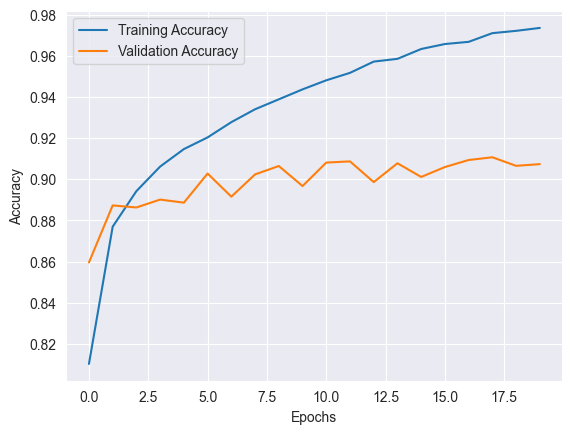

In [62]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now i'm going to add dropout, batch normalisation and weight regularisation to the model and see if it improves the results. I will also play around with the learning rate to see if it helps.

In [63]:
from keras.layers import Dropout, BatchNormalization, Dense
from keras.regularizers import l1, l2
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Layer-specific weight regularization (L2)
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)      

In [65]:
opt = Adam(learning_rate=0.005) # change the learning rate to 0.005 from the default of 0.001

In [66]:
# compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# fit the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.05, validation_data=(val_images, val_labels), callbacks=[tensorboard_callback]) # validation_split=0.05 means 5% of the training data will be used for validation

Epoch 1/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.9515 - accuracy: 0.7907 - val_loss: 0.8369 - val_accuracy: 0.8209
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.8390 - accuracy: 0.8234 - val_loss: 0.7156 - val_accuracy: 0.8573
Epoch 3/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.8057 - accuracy: 0.8341 - val_loss: 0.7422 - val_accuracy: 0.8544
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.7806 - accuracy: 0.8428 - val_loss: 0.7458 - val_accuracy: 0.8406
Epoch 5/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.7817 - accuracy: 0.8465 - val_loss: 0.6901 - val_accuracy: 0.8680
Epoch 6/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.7566 - accuracy: 0.8508 - val_loss: 0.7192 - val_accuracy: 0.8591
Epoch 7/20
1500/1500 [==============================] - 17s 12ms/step - loss: 0.7447 - accuracy: 0.8529 - val_loss: 0.6816 -

In [68]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.6192 - accuracy: 0.8872
Test loss: 0.6191623210906982, Test accuracy: 0.8871999979019165


In [69]:
# this will save the model so we can use it later without having to train it again
model_name = "model_5"
training_accuracy = history.history['accuracy'][-1] # get the last value in the accuracy list which is the final accuracy
validation_accuracy = history.history['val_accuracy'][-1] # get the last value in the val_accuracy list which is the final val_accuracy
training_loss = history.history['loss'][-1] # get the last value in the loss list which is the final loss
validation_loss = history.history['val_loss'][-1] # get the last value in the val_loss list which is the final val_loss
add_model_results(model_name, training_accuracy, validation_accuracy, training_loss, validation_loss) # add the results to the results dictionary

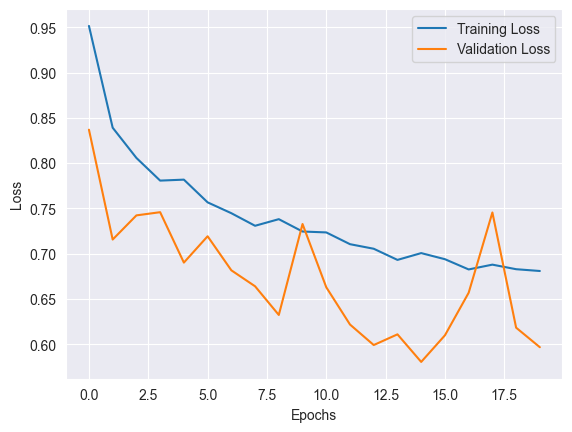

In [70]:
# plot the training and validation loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

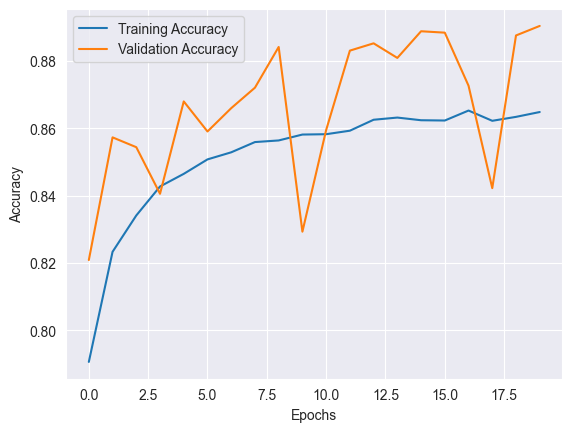

In [71]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
# print the results
for result in results:
    print(result)

{'model_name': 'model_1', 'training_accuracy': 0.9296249747276306, 'validation_accuracy': 0.8910833597183228, 'training_loss': 0.18249741196632385, 'validation_loss': 0.3343411982059479}
{'model_name': 'model_2', 'training_accuracy': 0.9323958158493042, 'validation_accuracy': 0.8913333415985107, 'training_loss': 0.17544244229793549, 'validation_loss': 0.3523043990135193}
{'model_name': 'model_3', 'training_accuracy': 0.9287291765213013, 'validation_accuracy': 0.8863333463668823, 'training_loss': 0.18503530323505402, 'validation_loss': 0.3931850492954254}
{'model_name': 'model_4', 'training_accuracy': 0.9736666679382324, 'validation_accuracy': 0.9074166417121887, 'training_loss': 0.06944458186626434, 'validation_loss': 0.4288804829120636}
{'model_name': 'model_5', 'training_accuracy': 0.8648541569709778, 'validation_accuracy': 0.89041668176651, 'training_loss': 0.6808371543884277, 'validation_loss': 0.5966628789901733}


In [73]:
# save the results to a csv file
import csv

with open('results.csv', 'w') as csvfile:
    # creating a csv dict writer object
    writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())

    # writing headers (field names)
    writer.writeheader()

    # writing data rows
    writer.writerows(results)


In [74]:
# Define the table header
header = ['Model Name', 'Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss']

# Extract the values from the dictionaries and create a list of lists
table_data = [list(item.values()) for item in results]

# Print the results as a table
from IPython.display import HTML, display
import tabulate

display(HTML(tabulate.tabulate(table_data, headers=header, tablefmt='html')))

Model Name,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
model_1,0.929625,0.891083,0.182497,0.334341
model_2,0.932396,0.891333,0.175442,0.352304
model_3,0.928729,0.886333,0.185035,0.393185
model_4,0.973667,0.907417,0.0694446,0.42888
model_5,0.864854,0.890417,0.680837,0.596663


In [75]:
# get the best model from the results
best_model = max(results, key=lambda x: x['validation_accuracy']) # get the model with the highest validation accuracy
# print the best model number and the validation accuracy
print(f"Best model: {best_model['model_name']}, Validation accuracy: {best_model['validation_accuracy']}")

Best model: model_4, Validation accuracy: 0.9074166417121887


In [76]:
# print the shape of train and test images
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

Train images shape: (48000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


In [81]:
#reload_ext tensorboard

In [82]:
# load this folder and show it on tensorboard logs/20230417-133109 (the folder name will be different)
%load_ext tensorboard
%tensorboard --logdir logs/20230417-133109 --host localhost --port 6006 # the port number can be changed if it is already in use

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...